# <font color="red">Getting the Test Dataset & Importing Libraries</font>

In [ ]:
!unzip "/content/drive/MyDrive/AAIC - Assignments/SNo.32_Self Case Study 2/test.zip"

In [25]:
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,PrecisionRecallDisplay
import pickle
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tqdm import tqdm
from tensorflow.keras.applications.vgg19 import preprocess_input as vgg19_prep
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

# <font color="red">Importing the best model and the class indices dictionary</font>

In [5]:
model = load_model("/content/drive/MyDrive/AAIC - Assignments/SNo.32_Self Case Study 2/ALL_MODELS/model-11/save_model/weights-55-0.2253.h5")

class_indices = pd.read_pickle(r"/content/drive/MyDrive/AAIC - Assignments/SNo.32_Self Case Study 2/ALL_MODELS/class_indices.pkl")

In [6]:
print(class_indices)

{'ABBOTTS BABBLER': 0, 'ABBOTTS BOOBY': 1, 'ABYSSINIAN GROUND HORNBILL': 2, 'AFRICAN CROWNED CRANE': 3, 'AFRICAN EMERALD CUCKOO': 4, 'AFRICAN FIREFINCH': 5, 'AFRICAN OYSTER CATCHER': 6, 'ALBATROSS': 7, 'ALBERTS TOWHEE': 8, 'ALEXANDRINE PARAKEET': 9, 'ALPINE CHOUGH': 10, 'ALTAMIRA YELLOWTHROAT': 11, 'AMERICAN AVOCET': 12, 'AMERICAN BITTERN': 13, 'AMERICAN COOT': 14, 'AMERICAN GOLDFINCH': 15, 'AMERICAN KESTREL': 16, 'AMERICAN PIPIT': 17, 'AMERICAN REDSTART': 18, 'AMETHYST WOODSTAR': 19, 'ANDEAN GOOSE': 20, 'ANDEAN LAPWING': 21, 'ANDEAN SISKIN': 22, 'ANHINGA': 23, 'ANIANIAU': 24, 'ANNAS HUMMINGBIRD': 25, 'ANTBIRD': 26, 'ANTILLEAN EUPHONIA': 27, 'APAPANE': 28, 'APOSTLEBIRD': 29, 'ARARIPE MANAKIN': 30, 'ASHY THRUSHBIRD': 31, 'ASIAN CRESTED IBIS': 32, 'AVADAVAT': 33, 'AZURE JAY': 34, 'AZURE TANAGER': 35, 'AZURE TIT': 36, 'BAIKAL TEAL': 37, 'BALD EAGLE': 38, 'BALD IBIS': 39, 'BALI STARLING': 40, 'BALTIMORE ORIOLE': 41, 'BANANAQUIT': 42, 'BAND TAILED GUAN': 43, 'BANDED BROADBILL': 44, 'BANDED 

# <font color="red">Error Analysis</font>

In [9]:
s=[]  # A LIST TO STORE ALL SPECIES WHICH HAVE BEEN PREDICTED CORRECTLY
p=[]  # A LIST OF PATHS TO ALL THE CORRECTLY PREDICTED IMAGES
w,h = 224,224 # WIDTH,HEIGHT OF IMAGES TO BE FED TO THE MODEL
y_true_labels = []  # ACTUAL LABELS
y_pred_labels = []  # CORRECTLY PREDICTED LABELS
y_pred_probscores = []  # PROBABILITY SCORES GIVEN BY THE MODEL

for species in tqdm(class_indices.keys()):  # ITERATE THROUGH ALL THE CLASSES
  for i in range(1,6):
    y_true_labels.append(class_indices.get(species))  # UPDATE ACTUAL LABELS LIST

    path = "/content/test/" + species + "/" + str(i) + ".jpg"
    img = vgg19_prep(img_to_array(load_img(path, target_size=(w,h))))
    img = np.expand_dims(img, axis=0)

    prediction_probability = model.predict(img) # PREDICT THE LABEL

    sorted_preds = np.sort(prediction_probability)[0][::-1][0]
    y_pred_probscores.append(sorted_preds)  # SAVE THE PROBABILITY SCORE LIST

    top = np.argsort(prediction_probability)[0][::-1][0]
    y_pred_labels.append(top) # SAVE THE PREDICTED LABEL
    
    if top == class_indices.get(species):
      s.append(species)
      p.append(path)

100%|██████████| 400/400 [23:08<00:00,  3.47s/it]


In [ ]:
# SUBTRACTING ALL THE CORRECTLY PREDICTED SPECIES FROM THE MAIN SPECIES NAMES
# THESE ARE THE CLASSES WHICH ARE WRONGLY PREDICTED

In [42]:
incorrectly_predicted_species = list(set(list(class_indices)) - set(s))
incorrectly_predicted_species

['AZURE TANAGER', 'ABBOTTS BABBLER', 'ABBOTTS BOOBY', 'PURPLE MARTIN']

<font color="red">Conclusion</font>: Only the above 4 species were not predicted correctly

In [13]:
# SANITY (400 CLASSES * 5 IMAGES IN EACH CLASS = 2000 PREDICTIONS)
len(y_true_labels),len(y_pred_labels),len(y_pred_probscores)

(2000, 2000, 2000)

<font color="red">Note</font>: Visualizing the confusion matrix will be very complex in this case since there are 400 classes in total.

In [14]:
c = confusion_matrix(y_true_labels, y_pred_labels)
print(c)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 5 0]
 [0 0 0 ... 0 0 5]]


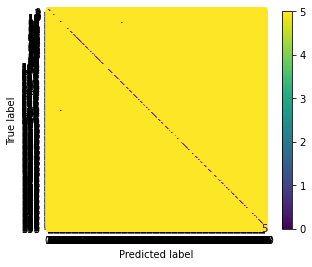

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_true_labels, y_pred_labels)

In [ ]:
# https://stats.stackexchange.com/questions/51296/how-do-you-calculate-precision-and-recall-for-multiclass-classification-using-co

In [ ]:
# COMPUTE THE PRECISION & RECALL OF EACH CLASS SEPARATELY

In [ ]:
rec = np.diag(c) / np.sum(c,axis=1)
prec = np.diag(c) / np.sum(c,axis=0)

In [37]:
# SANITY
print(rec.shape)
print(prec.shape)

(400,)
(400,)


In [38]:
print(rec)

[0.  0.  0.8 1.  0.6 0.4 1.  0.8 0.2 0.8 0.6 0.8 0.8 0.6 0.2 0.8 1.  0.8
 0.4 0.8 0.8 0.4 0.4 1.  0.4 0.8 1.  0.8 0.4 0.2 0.8 0.4 1.  0.2 0.8 0.
 0.8 0.4 0.8 1.  1.  0.8 0.8 1.  1.  1.  1.  0.2 0.8 1.  0.6 1.  0.6 1.
 1.  1.  1.  1.  1.  1.  0.8 1.  0.6 1.  0.6 1.  1.  0.8 1.  1.  0.8 0.8
 1.  0.6 0.6 0.6 0.6 1.  1.  0.8 1.  1.  0.4 0.8 0.8 1.  0.8 1.  1.  0.6
 1.  0.2 1.  0.8 0.6 1.  0.6 0.8 0.6 1.  0.8 1.  0.6 0.6 1.  0.8 1.  0.8
 0.6 0.8 0.8 0.6 0.8 0.8 1.  0.8 1.  1.  1.  0.6 1.  0.4 1.  0.4 1.  1.
 0.6 0.6 0.8 0.6 1.  0.6 0.4 1.  0.2 0.8 1.  0.8 1.  0.4 0.6 0.8 1.  1.
 0.2 0.4 0.6 1.  0.6 0.6 0.8 0.8 0.8 1.  1.  1.  1.  1.  0.4 0.8 1.  1.
 1.  1.  0.6 1.  1.  0.8 0.4 1.  0.6 0.8 1.  1.  0.8 1.  1.  0.4 1.  0.6
 1.  0.8 0.8 1.  1.  0.8 0.4 1.  1.  0.8 0.2 0.8 0.6 1.  0.8 1.  0.2 1.
 1.  1.  1.  1.  1.  0.4 0.8 1.  0.6 1.  1.  1.  0.8 1.  1.  1.  0.2 0.8
 1.  0.8 1.  1.  0.8 0.6 1.  1.  0.8 0.6 1.  1.  0.4 0.8 1.  0.8 0.8 0.8
 0.4 0.6 1.  0.8 1.  0.8 1.  1.  1.  0.4 0.8 0.8 1.  0.8 

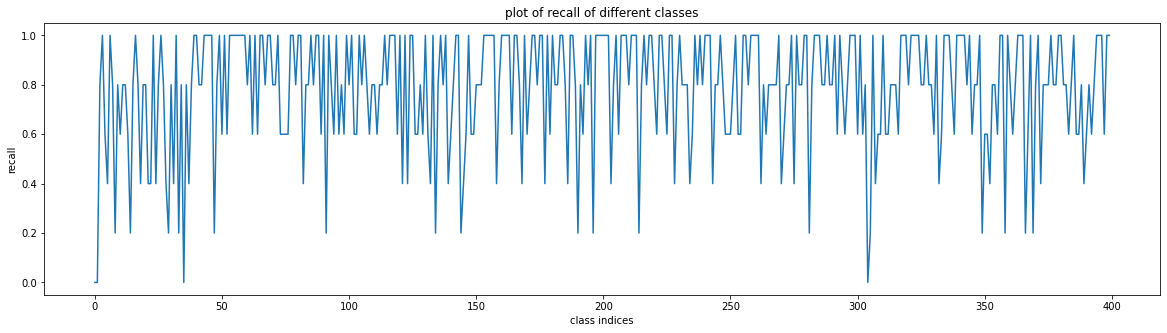

In [41]:
plt.figure(figsize=(20,5))
plt.xlabel("class indices")
plt.ylabel("recall")
plt.title("plot of recall of different classes")
plt.plot(rec)

<font color="red">Observations from the recall plot:</font> Maximum classes have recall=1, some have 0.5-0.8.

In [24]:
prec

array([       nan,        nan, 0.8       , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.6       , 1.        , 1.        , 1.        , 1.        ,
       0.66666667, 0.5       , 1.        , 1.        , 0.66666667,
       1.        , 1.        , 1.        , 0.83333333, 1.        ,
       0.8       , 0.33333333, 1.        , 0.66666667, 1.        ,
       1.        , 0.66666667, 1.        , 1.        , 0.30769231,
              nan, 1.        , 1.        , 0.8       , 0.55555556,
       1.        , 0.8       , 1.        , 0.83333333, 1.        ,
       0.625     , 1.        , 1.        , 1.        , 0.625     ,
       0.75      , 1.        , 1.        , 1.        , 0.625     ,
       1.        , 0.71428571, 0.83333333, 0.71428571, 0.71428571,
       0.57142857, 1.        , 1.        , 1.        , 1.        ,
       0.83333333, 0.55555556, 0.57142857, 0.83333333, 1.        ,
       0.8       , 1.        , 1.        , 0.42857143, 1.     

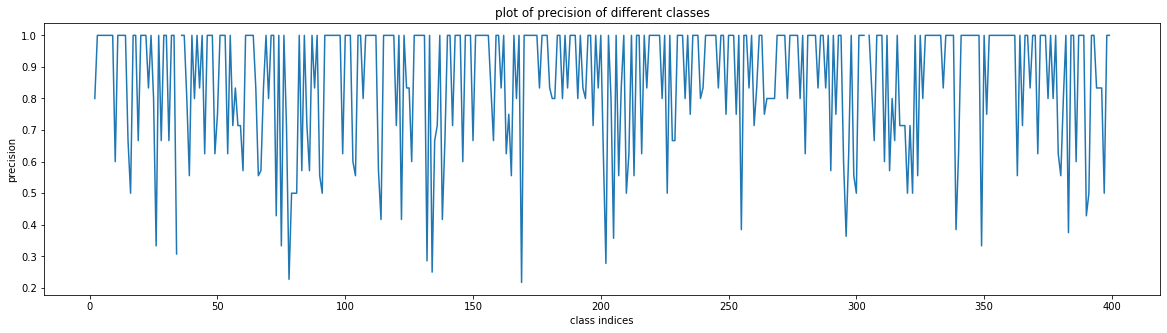

In [40]:
plt.figure(figsize=(20,5))
plt.xlabel("class indices")
plt.ylabel("precision")
plt.title("plot of precision of different classes")
plt.plot(prec)

<font color="red">Observations from the precision plot:</font> Maximum classes have precision=1.
And as per the precision array printed, there are 4 nan values since they belong to those 4 classes for which the model couldn't predict correctly. Let's see how those species of birds look and what the machine thinks.

In [46]:
def predict_bird_species(img_path,img_width,img_height,actual_species_name,best_model,tf_lr=False,prep_func=None):
  """This function helps us to visualize the model's predictions a.k.a thoughts"""
  plt.subplots(figsize=(20,5))

  # load the image
  img = load_img(img_path, target_size=(img_width,img_height))  # (img_width,img_height,3)

  plt.subplot(1,6,1)
  title_text = "Actual Species:",actual_species_name
  plt.title(title_text,fontsize=8)
  plt.imshow(img)

  # convert to array
  img = img_to_array(img) # (img_width,img_height,3)

  # modify as per the pre-defined model being fed
  if tf_lr == True:
    img = prep_func(img)

  # add batch size as a dimension 
  img = np.expand_dims(img, axis=0)  #(1,img_width,img_height,3)

  prediction_probability = best_model.predict(img)
  sorted_preds = np.sort(prediction_probability)[0][::-1]
  top5preds = np.argsort(prediction_probability)[0][::-1][:5]

  all_species = {v:k for k,v in class_indices.items()}
  # print("Top 5 species & the probabilities with which the model thinks that this bird belongs to:-")
  for i in range(len(top5preds)):
    pred_species = all_species.get(top5preds[i])
    other_img = load_img("/content/test/"+pred_species+"/1.jpg", target_size=(img_width,img_height))

    plt.subplot(1,6,i+2)
    title_text = pred_species + ":" + str(sorted_preds[i])
    plt.title(title_text,fontsize=8)
    plt.imshow(other_img)

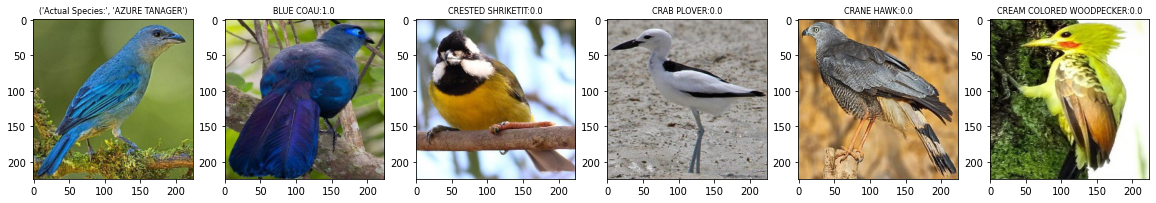

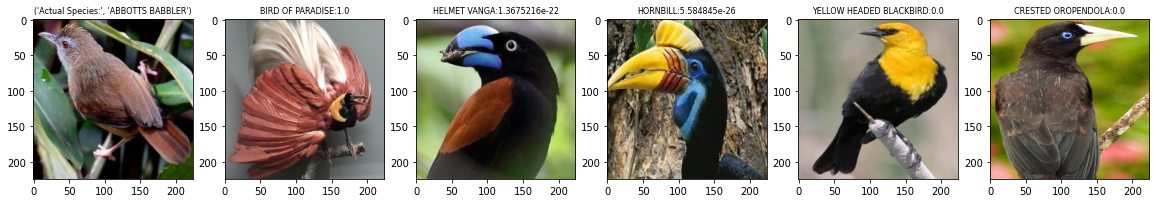

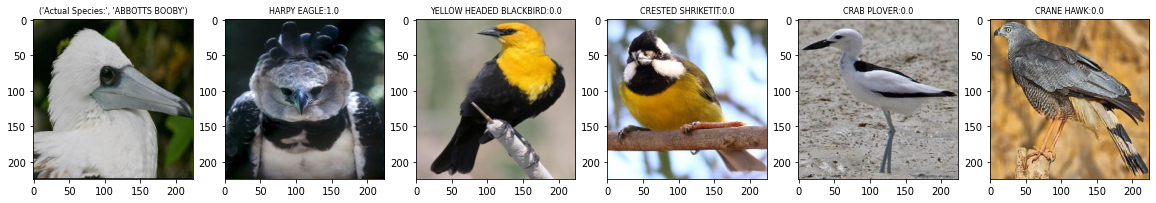

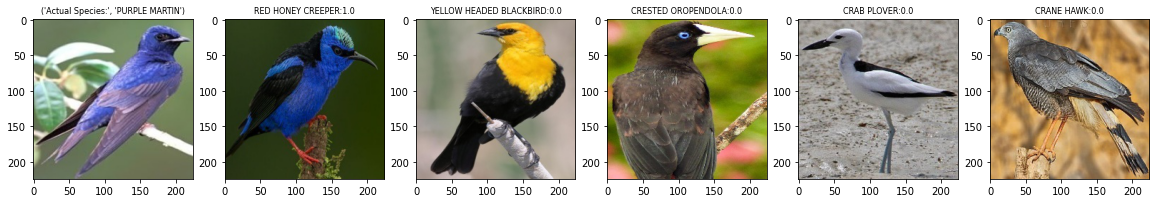

In [47]:
for inc_sp in incorrectly_predicted_species:
  im_path = "/content/test/" + inc_sp + "/1.jpg"
  predict_bird_species(img_path=im_path,img_width=224,img_height=224,actual_species_name=inc_sp,best_model=model,tf_lr=True,prep_func=vgg19_prep)

<font color="red">Observations:-</font>
* AZURE TANAGER is mistaken as BLUE COAU --> probably because of such close shades of blue both these species have.
* ABBOTS BABBLER is mistaken as BIRD OF PARADISE --> probably because of such close shades of brown both these species have.
* AZURE TANAGER is mistaken as HAPPY EAGLE --> probably because of such close shades of white and black both these species have.
* PURPLE MARTIN is mistaken as RED HONEY CREEPER --> probably because of such close shades of mix of blue, purple & green both these species have.<br>

All in all, our fine-tuned VGG19 is performing very good with the rest of the 396 species all of which belong to a completely unseen test dataset. Only 4 species are being mistaken.